# Tarefa 4 - Limpeza e Transformação

## Importando os dados

In [1]:
import pandas as pd
from IPython.display import clear_output
from concat_df import concat_df

df = concat_df()
df.head()

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year
0,2753519,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,411,2009
1,2753520,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,429,2009
2,2753521,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,109,2009
3,2753522,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4.206050e+12,Maintenance of Office,TIM CELULAR S/A,68,2009
4,2753523,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2.418000e+12,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009


## Transformação de Dados

### Tranformação de Tipos

#### receipt_social_security_number

In [2]:
df = df.astype({"receipt_social_security_number": str})

df.head()

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year
0,2753519,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,411,2009
1,2753520,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,429,2009
2,2753521,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,109,2009
3,2753522,0,2009-05-19 00:00:00,1772,PSB,SP,Abelardo Camarinha,4206050005140.0,Maintenance of Office,TIM CELULAR S/A,68,2009
4,2753523,0,2009-09-25 00:00:00,1772,PSB,SP,Abelardo Camarinha,2418000000131.0,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009


Como originalmente os dados dessa coluna estavam como um ponto flutuante, acaba que os últimos caracteres sejam **'.0'**, mas vejamos se é em todos os casos:

In [3]:
df['l'] = df['receipt_social_security_number'].apply(lambda x : x.endswith('0'))

df[df['l'] == False]

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,l
34,2753553,0,2009-06-07 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,225,2009,False
35,2753554,0,2009-07-01 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,984,2009,False
36,2753555,0,2009-07-21 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,1889,2009,False
37,2753556,0,2009-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,919,2009,False
38,2753557,0,2009-07-26 00:00:00,1772,PSB,SP,Abelardo Camarinha,nan,Telephony,CELULAR FUNCIONAL,89,2009,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251673,2050518,0,2017-05-25 11:14:52,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,20,2017,False
251674,2050519,0,2017-05-25 11:14:06,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,174,2017,False
251675,2050520,0,2017-05-29 11:53:33,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,1140,2017,False
251676,2050521,0,2017-07-06 10:57:31,2930,PR,RN,Zenaide Maia,nan,Postal Services,CORREIOS - ENCOMENDA PAC,15,2017,False


Como se vê acima, aparenta que os casos em que o número não termina com **.0** se deve ao fato do valor da coluna ser **nan**

In [4]:
df[(df['l'] == False) & (df['receipt_social_security_number'] != 'nan')]

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,l


O que se percebe é que aqueles que não terminam com '.0' é pelo fato de serem nan antes da conversão.

In [5]:
df['receipt_social_security_number'] = df['receipt_social_security_number'].apply(lambda x : x[:-2] if x != 'nan' else x)

df['receipt_social_security_number']

0         4206050005140
1         4206050005140
2         4206050005140
3         4206050005140
4         2418000000131
              ...      
251877    2012862000160
251878    2012862000160
251879    2012862000160
251880    2012862000160
251881    2012862000160
Name: receipt_social_security_number, Length: 3014902, dtype: object

A impressão que dá é que o CNPJ ou CPF desta coluna estão com menos dígitos que o original, um CNPJ possui [14 dígitos](https://weel.com.br/blog/o-que-e-cnpj) e um CPF [11 dígitos](http://www.dbins.com.br/dica/como-funciona-a-logica-da-validacao-do-cpf).

Uma hipótese para isto é que CNPJs do tipo **0X.XXX.XXX/XXXX-XX**, ao serem convertidos para um número de ponto flutuante acabam tendo seus 0 à esquerda ignorados.

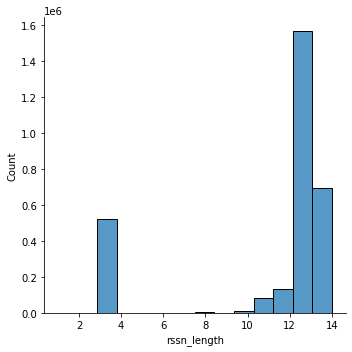

In [6]:
import seaborn as sns

df['rssn_length'] = df['receipt_social_security_number'].apply(lambda x : len(x))

sns.displot(df, x=df['rssn_length'], bins=14)

O histograma mostra que de fato uma parte dos dados possuiam 0s à esquerda quando foram convertidos perderam parte do seu comprimento, logo, ignorando os **nan**, temos uma parte dos dados com muitos dígitos faltando, um problema são os que possuem tamanha entre 8 e 11, pois podem ser, por ora, tanto CPF quanto CNPJ, sendo necessária uma verificação adicional nestes casos. Aqueles com tamanho 12 e 13, constituem CNPJs, e portanto podem ser convertidos.

In [7]:
concat_dict = {12: '00', 13: '0'}

df['receipt_social_security_number'] = df['receipt_social_security_number'].apply(lambda x : (concat_dict[len(x)] + x) if len(x) in concat_dict else x)

As colunas criadas para o tratamento de **receipt_social_security_number** não possuem relevância para outras tarefas, logo serão apagadas.

In [8]:
df.drop(columns=['rssn_length', 'l'], inplace=True)

#### receipt_date

In [9]:
df['receipt_date'] = pd.to_datetime(df['receipt_date'])

df['month'] = df['receipt_date'].dt.month
df['day_of_week'] = df['receipt_date'].dt.dayofweek

df.head(5)

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
0,2753519,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,04206050005140,Maintenance of Office,TIM CELULAR S/A,411,2009,5,1
1,2753520,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,04206050005140,Maintenance of Office,TIM CELULAR S/A,429,2009,5,1
2,2753521,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,04206050005140,Maintenance of Office,TIM CELULAR S/A,109,2009,5,1
3,2753522,0,2009-05-19,1772,PSB,SP,Abelardo Camarinha,04206050005140,Maintenance of Office,TIM CELULAR S/A,68,2009,5,1
4,2753523,0,2009-09-25,1772,PSB,SP,Abelardo Camarinha,02418000000131,Fuels and lubricants.,AUTO POSTO ALVORADA,4395,2009,9,4


### Redimensionamento

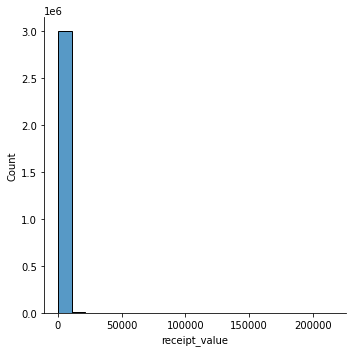

In [10]:
import seaborn as sns

sns.displot(df, x="receipt_value", bins=20)

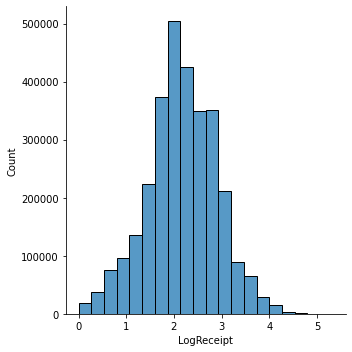

In [11]:
import numpy as np

df_receipt = df[df["receipt_value"] > 0].copy()
df_receipt["LogReceipt"] = np.log10(df_receipt["receipt_value"])
sns.displot(df_receipt, x="LogReceipt", bins=20)

In [12]:
df_receipt.sort_values("receipt_value", ascending=False).head(5)

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week,LogReceipt
34449,1479100,0,2012-12-14,292,PTB,SP,Arnaldo Faria De Sá,05511195000158,Dissemination of the Parliamentary Activity.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,215000,2012,12,4,5.332438
30802,390710,0,2014-12-19,292,PTB,SP,Arnaldo Faria De Sá,54450705000130,Dissemination of the Parliamentary Activity.,GRÁFICA TRÊS PONTAS,208320,2014,12,4,5.318731
34364,34364,0,2013-12-27,292,PTB,SP,Arnaldo Faria De Sá,05511195000158,Dissemination of the Parliamentary Activity.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,197370,2013,12,4,5.295281
36334,724095,0,2011-12-19,292,PTB,SP,Arnaldo Faria De Sá,05511195000158,Dissemination of the Parliamentary Activity.,BALCOLOR,197000,2011,12,0,5.294466
35989,723750,0,2011-12-26,974,PT,SP,Arlindo Chinaglia,09023310000104,Dissemination of the Parliamentary Activity.,ALL WIN PROPAGANDA LTDA,194100,2011,12,0,5.288026


**Quais colunas precisaram de transformação? Que métodos foram utilizados nas colunas?**

As colunas que precisaram de transformação foram: **receipt_social_security_number,receipt_date e receipt_value**. 

Em **receipt_social_security_number** que era um atributo do tipo float foi transformado para o tipo string. Ou seja, aconteceu uma transformação de um tipo de dado. Além disso, houve um tratamento parcial para dados ausentes, um problema porém, é o que fazer para alguns dados, para determinar se estes constituem um CPF ou CNPJ.

Já com o **receipt_date**, este foi transformado para o tipo datetime pois estava como object, com isso, foi possível com isso extrair o mês e o dia da semana no qual o recibo foi emitido.  

Por fim, o **receipt_value** possuia muitos valores pequenos valores concatenados em uma pequena proporção de intervalo de valores. Então, foi realizado um redimensionamento para reduzir essa diferenção desproporcional e para realizar uma melhor  análise dos valores. 


converter o security number para string -> O mesmo tem dados faltantes(observar o que fazer)

transformar dos dados da data -> Dia da semana e mês

receipt_value -> seguir uma distribuição mais uniforme (o que o professor fez em redimensionamento) 

conferir dados faltantes - (preencher ou dropar) - null, nan, vazio

conferir dados duplicados



## Limpeza de Dados

### Dados Faltantes

In [13]:
df.isnull().sum()

Unnamed: 0                        0
bugged_date                       0
receipt_date                      0
deputy_id                         0
political_party                   0
state_code                        0
deputy_name                       0
receipt_social_security_number    0
receipt_description               0
establishment_name                0
receipt_value                     0
year                              0
month                             0
day_of_week                       0
dtype: int64

In [14]:
df.isna().sum()

Unnamed: 0                        0
bugged_date                       0
receipt_date                      0
deputy_id                         0
political_party                   0
state_code                        0
deputy_name                       0
receipt_social_security_number    0
receipt_description               0
establishment_name                0
receipt_value                     0
year                              0
month                             0
day_of_week                       0
dtype: int64

### Dados Duplicados

In [15]:
df[df.duplicated()]

,Unnamed: 0,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,year,month,day_of_week
